<a href="https://colab.research.google.com/github/bhaavi/FastQC-Analysis/blob/main/BWA_and_IGV_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Update and install dependencies
!apt-get update
!apt-get install -y zlib1g-dev libbz2-dev liblzma-dev

# Download and install BWA
!apt-get install -y bwa

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,851 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,138 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [ ]:
!bwa


Program: bwa (alignment via Burrows-Wheeler transformation)
Version: 0.7.17-r1188
Contact: Heng Li <lh3@sanger.ac.uk>

Usage:   bwa <command> [options]

Command: index         index sequences in the FASTA format
         mem           BWA-MEM algorithm
         fastmap       identify super-maximal exact matches
         pemerge       merge overlapping paired ends (EXPERIMENTAL)
         aln           gapped/ungapped alignment
         samse         generate alignment (single ended)
         sampe         generate alignment (paired ended)
         bwasw         BWA-SW for long queries

         shm           manage indices in shared memory
         fa2pac        convert FASTA to PAC format
         pac2bwt       generate BWT from PAC
         pac2bwtgen    alternative algorithm for generating BWT
         bwtupdate     update .bwt to the new format
         bwt2sa        generate SA from BWT and Occ

Note: To use BWA, you need to first index the genome with `bwa index'.
      There are

In [ ]:
from google.colab import files

# Upload FASTQ file
uploaded = files.upload()

# Upload reference genome (FASTA)
uploaded = files.upload()

Saving SRR33976241.fastq.gz to SRR33976241.fastq (1).gz


Saving GCF_009858895.2_ASM985889v3_cds_from_genomic.fna.gz to GCF_009858895.2_ASM985889v3_cds_from_genomic.fna.gz


In [ ]:
!bwa index /content/GCF_009858895.2_ASM985889v3_cds_from_genomic.fna.gz

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.01 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.01 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index /content/GCF_009858895.2_ASM985889v3_cds_from_genomic.fna.gz
[main] Real time: 0.069 sec; CPU: 0.025 sec


In [ ]:
!bwa mem /content/GCF_009858895.2_ASM985889v3_cds_from_genomic.fna.gz /content/SRR33976241.fastq.gz > aligned_reads.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 178476 sequences (10000033 bp)...
[M::process] read 178506 sequences (10000022 bp)...
[M::mem_process_seqs] Processed 178476 reads in 5.041 CPU sec, 5.091 real sec
[M::process] read 178928 sequences (10000182 bp)...
[M::mem_process_seqs] Processed 178506 reads in 4.531 CPU sec, 3.996 real sec
[M::process] read 178582 sequences (10000028 bp)...
[M::mem_process_seqs] Processed 178928 reads in 4.551 CPU sec, 4.023 real sec
[M::process] read 178742 sequences (10000087 bp)...
[M::mem_process_seqs] Processed 178582 reads in 5.114 CPU sec, 5.187 real sec
[M::process] read 43556 sequences (2424718 bp)...
[M::mem_process_seqs] Processed 178742 reads in 4.032 CPU sec, 3.768 real sec
[M::mem_process_seqs] Processed 43556 reads in 1.198 CPU sec, 1.010 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem /content/GCF_009858895.2_ASM985889v3_cds_from_genomic.fna.gz /content/SRR33976241.fastq.gz
[main] Real time: 23.787 sec; CPU: 2

In [ ]:
# Install Samtools
!apt-get install -y samtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  cwltool
The following NEW packages will be installed:
  libhts3 libhtscodecs2 samtools
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 963 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 samtools amd64 1.13-4 [520 kB]
Fetched 963 kB in 1s (820 kB/s)
Selecting previously unselected package libhtscodecs2:amd64.
(Reading database ... 126301 files and directories currently installed.)
Preparing to unpack .../libhtscodecs2_1.1.1-3_amd64.deb ...
Unpacking libhtscodecs2:amd64 (1.1.1-

In [ ]:
# Convert the SAM file to BAM format
!samtools view -bS /content/aligned_reads.sam > aligned_reads.bam

In [ ]:
# Sort the BAM file
!samtools sort /content/aligned_reads.bam > aligned_reads_sorted.bam
!samtools sort /content/aligned_reads.sam > aligned_reads_sorted.bai



In [ ]:
# Index the sorted BAM file to generate .bai for fast access
!samtools index aligned_reads_sorted.bam
!samtools index aligned_reads_sorted.bai


In [ ]:
from google.colab import files

# Download the sorted BAM and its index
files.download('aligned_reads_sorted.bam')
files.download('aligned_reads_sorted.bam.bai')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!samtools sort aligned_reads.bam -o aligned_reads.bam

In [ ]:
!samtools depth aligned_reads.bam > coverage.txt
!head coverage.txt

lcl|NC_045512.2_cds_YP_009724389.1_1	1	13
lcl|NC_045512.2_cds_YP_009724389.1_1	2	13
lcl|NC_045512.2_cds_YP_009724389.1_1	3	14
lcl|NC_045512.2_cds_YP_009724389.1_1	4	14
lcl|NC_045512.2_cds_YP_009724389.1_1	5	15
lcl|NC_045512.2_cds_YP_009724389.1_1	6	16
lcl|NC_045512.2_cds_YP_009724389.1_1	7	17
lcl|NC_045512.2_cds_YP_009724389.1_1	8	17
lcl|NC_045512.2_cds_YP_009724389.1_1	9	17
lcl|NC_045512.2_cds_YP_009724389.1_1	10	19


In [ ]:
!head aligned_reads_sorted.bam.bai

"cb   Ē"cb   0i�b   B1i�b   �)�b   ��)�b   �%��b   ��b   �6��b   ��S�b   q$c   �$c   @�6c   ���6c   � ePc   C�ePc   ic   ��ic   ���c   ����c   � �c   ��c   � ��c   x���c   � ��c   k�b d   � md   ��md     �=d   �
Oe   J     �
��  s#                 -�  �     

lcl|NC_045512.2_cds_YP_009724389.1_1	1	13
lcl|NC_045512.2_cds_YP_009724389.1_1	2	13
lcl|NC_045512.2_cds_YP_009724389.1_1	3	14
lcl|NC_045512.2_cds_YP_009724389.1_1	4	14
lcl|NC_045512.2_cds_YP_009724389.1_1	5	15
lcl|NC_045512.2_cds_YP_009724389.1_1	6	16
lcl|NC_045512.2_cds_YP_009724389.1_1	7	17
lcl|NC_045512.2_cds_YP_009724389.1_1	8	17
lcl|NC_045512.2_cds_YP_009724389.1_1	9	17
lcl|NC_045512.2_cds_YP_009724389.1_1	10	19


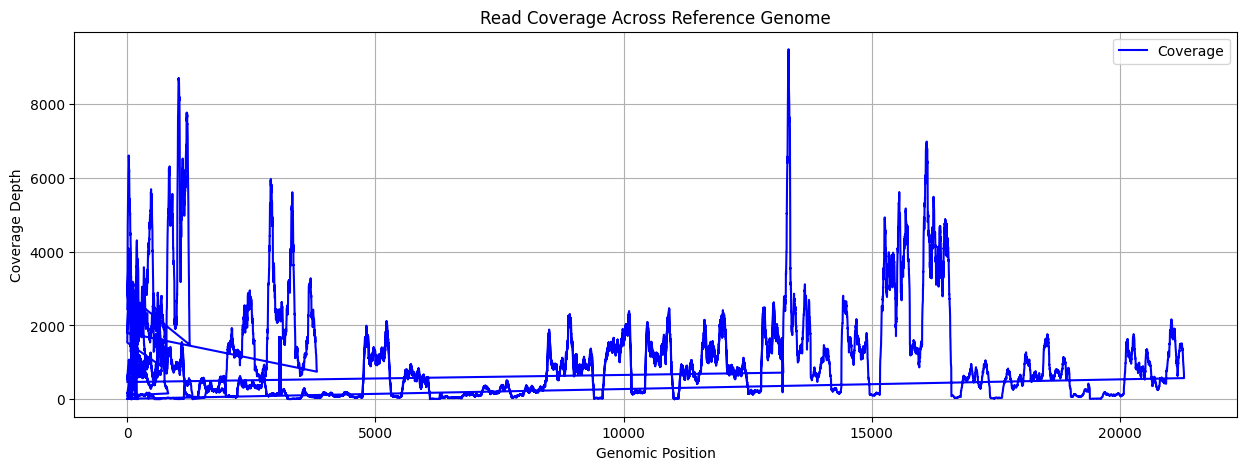

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_bam_coverage(bam_file):
    # Generate depth file
    !samtools depth {bam_file} > coverage.txt

    # Preview
    !head coverage.txt

    # Load as structured array (chrom, pos, depth)
    coverage_data = np.genfromtxt('coverage.txt', dtype=None, encoding=None, delimiter='\t')

    # If empty, stop
    if coverage_data.size == 0:
        print("coverage.txt is empty. No reads found.")
        return

    # Plot using field names
    positions = coverage_data['f1']
    depth = coverage_data['f2']

    plt.figure(figsize=(15, 5))
    plt.plot(positions, depth, label='Coverage', color='blue')
    plt.title('Read Coverage Across Reference Genome')
    plt.xlabel('Genomic Position')
    plt.ylabel('Coverage Depth')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call it on sorted BAM
visualize_bam_coverage('aligned_reads_sorted.bam')

In [ ]:
!samtools faidx /content/GCF_009858895.2_ASM985889v3_cds_from_genomic.fna.gz

[E::fai_build3_core] Cannot index files compressed with gzip, please use bgzip
[faidx] Could not build fai index /content/GCF_009858895.2_ASM985889v3_cds_from_genomic.fna.gz.fai


In [ ]:
!samtools faidx /content/GCF_009858895.2_ASM985889v3_cds_from_genomic.fna